In [2]:
# fashion Mnist

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D


import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34


In [10]:
fashion_mnist = keras.datasets.fashion_mnist
((train_images, train_labels),(test_images,test_labels))=fashion_mnist.load_data()

In [11]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [12]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [13]:
# 레이블을 설정해보세요.
labels = ["T-shirt/top",  # index 0
        "Trouser",      # index 1
        "Pullover",     # index 2 
        "Dress",        # index 3 
        "Coat",         # index 4
        "Sandal",       # index 5
        "Shirt",        # index 6 
        "Sneaker",      # index 7 
        "Bag",          # index 8 
        "Ankle boot"]   # index 9

In [19]:
def idx2label(idx):
    return labels[idx]    

In [20]:
idx2label(0)

'T-shirt/top'

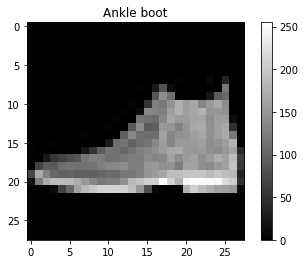

In [32]:
plt.imshow(test_images[0],cmap='gray')
plt.title(idx2label(test_labels[0]))
plt.colorbar()
plt.show()

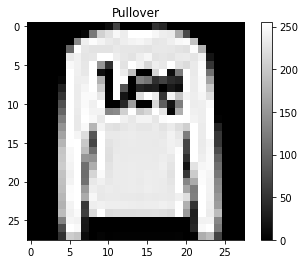

In [39]:
plt.imshow(test_images[1],cmap='gray')
plt.title(idx2label(test_labels[1]))
plt.colorbar()
plt.show()

In [42]:
def show(idx):
    plt.imshow(train_images[idx],cmap='gray')
    plt.title(idx2label(train_labels[idx]))
    plt.colorbar()
    plt.show()


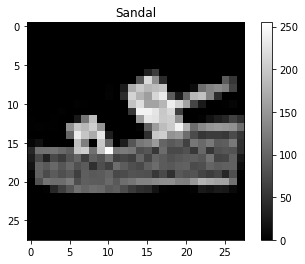

In [43]:
show(12)

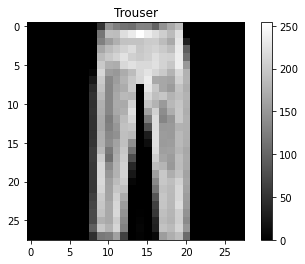

In [44]:
show(16)

In [48]:
### 문제 4. train_images에서 0이 아닌 값들을 출력해보세요.

In [56]:
train_images[train_images != 0][:5]

array([ 1, 13, 73,  1,  4], dtype=uint8)

In [58]:
train_images.shape,  train_images.reshape((60000,-1)).shape

((60000, 28, 28), (60000, 784))

In [61]:
# 이미지의 값이 가장 큰 idx와 작은 idx를 구하여 출력해보세요

In [67]:
# 제일 큰 값의 인덱스 argmax(), argmin()
train_images.reshape((60000,-1)).sum(axis=1).argmax(), train_images.reshape((60000,-1)).sum(axis=1).argmin()

(55023, 9230)

In [68]:
train_images.reshape((60000,-1)).sum(axis=1)[55023]
#AXIS=1 로 해서 열 기준으로 더해준다
# 55023이 인덱스임.

150387

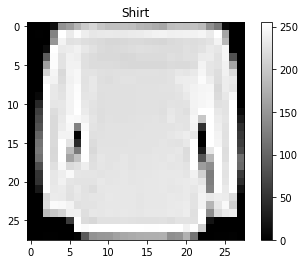

In [70]:
show(55023)

In [69]:
train_images.reshape((60000,-1)).sum(axis=1)[9230]

3876

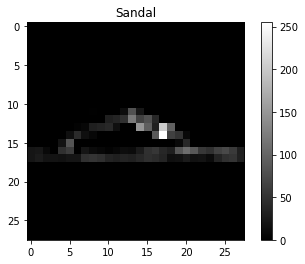

In [71]:
show(9230)

In [77]:
train_images.dtype

dtype('uint8')

In [87]:
# img,lab 최대 최소 출력

In [85]:
np.min(train_images), np.max(train_images)

(0, 255)

In [86]:
np.min(train_labels),np.max(train_labels)

(0, 9)

In [89]:
train_images.min(), train_images.max()

(0, 255)

In [90]:
test_images.min(), test_images.max()

(0, 255)

In [92]:
train_images.dtype, test_images.dtype

(dtype('uint8'), dtype('uint8'))

In [100]:
# type을 float 으로  바꾸기
train_images = train_images.astype(np.float64)
test_images = test_images.astype(np.float64)

In [94]:
train_images.dtype, test_images.dtype

(dtype('float64'), dtype('float64'))

In [95]:
train_images.min(), train_images.max()

(0.0, 255.0)

In [98]:
test_images.min(), test_images.max()

(0.0, 255.0)

In [99]:
# normalization
train_images = train_images/255

In [101]:
train_images.max(), train_images.min()

(1.0, 0.0)

In [102]:
def norm(data):
    min_v = data.min()
    max_v = data.max()
    return(data-min_v)/(max_v-min_v)

In [103]:
norm(train_images).min(), norm(train_images).max()

(0.0, 1.0)

In [104]:
a = norm(train_images)*3
print(a.min(), a.max())

0.0 3.0


# 시각화

In [106]:
train_images[:5].shape

(5, 28, 28)

In [108]:
# (60000, 28, 28)인 train_images에서 (5, 28, 28)을 획득하는 코드를 작성하세요.
# transpose는 tensor의 axis를 섞는 기능을 합니다.
# 해당 기능을 이용해서 (28, 140)을 작성하는 코드를 작성해보세요.
train_images[:5].transpose(1,0,2).reshape((28,-1)).shape

(28, 140)

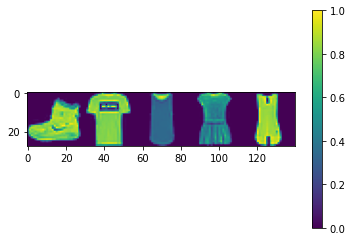

In [109]:
plt.imshow(train_images[:5].transpose(1,0,2).reshape((28,-1)))
plt.colorbar()
plt.show()

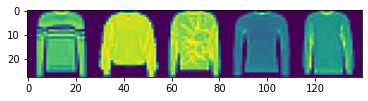

In [118]:
# 레이블에 따라 5개를 출력하는 함수를 만들어보세요.
# np.argwhere

plt.imshow(train_images[np.argwhere(train_labels==2)[:5, ...,0]].transpose((1,0,2)).reshape((28,-1)))

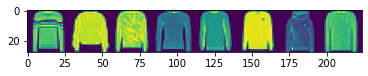

In [119]:
plt.imshow(train_images[np.argwhere(train_labels==2)[:8, ...,0]].transpose((1,0,2)).reshape((28,-1)))

In [122]:
def label_filter(label,count=5):
    imgs = train_images[np.argwhere(train_labels == label)[:count,...,0]].transpose(1,0,2).reshape(28,-1)
    plt.imshow(imgs)
    plt.show()

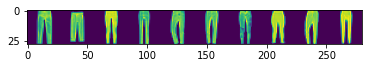

In [123]:
label_filter(1,10)

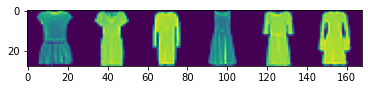

In [125]:
label_filter(3,6)

# Data augmentation

In [135]:
# 이미지 한장의 크기를 4배로 확대하고, 객체는 4분면 영역중 랜덤으로 1공간에 넣는 함수를 작성하여보세요.
def expanded_4times(img):
    bg = np.zeros(img.shape)
    idx = np.random.randint(0,4)
    
    slots =[bg,bg,bg,bg]
    
    slots[idx] = img
    
    expanded = np.vstack([
        np.hstack(slots[:2]),
        np.hstack(slots[2:])
        
    ])
    
    return expanded

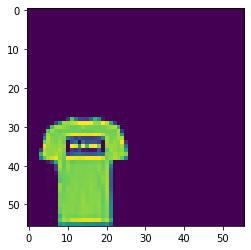

In [136]:
plt.imshow(expanded_4times(train_images[1]))

In [148]:
train_images = norm(train_images)
test_images = norm(test_images)

In [149]:
# 4배 이미지 변환을 전체 train/test 데이터에 실행하여 train_expand_images, test_expand_images를 생성하세요.
train_expand_images = np.array([expanded_4times(i) for i in train_images] )
test_expand_images = np.array([expanded_4times(i) for i in test_images])

In [150]:
print(train_expand_images.shape,test_expand_images.shape )
print(train_expand_images.dtype,test_expand_images.dtype )

print(train_expand_images.min(),test_expand_images.min() )
print(train_expand_images.max(),test_expand_images.max() )



(60000, 56, 56) (10000, 56, 56)
float64 float64
0.0 0.0
1.0 1.0


In [161]:
# 4배 이미지 변환 함수를 수정하여 이미지 사이즈를 4배 확대 시킨 뒤, 객체를 랜덤으로 1~4개, 랜덤 4분면에 위치시키는 함수를 작성하세요.
def expand_4times_rand(train_data, label_data):
    
    img=[]
    labels=[]
    
    for _ in range(4):
        bg = np.zeros((28,28))
        idx_count = np.random.randint(0,5)
        
        label = np.zeros((10,))

        slots =[bg,bg,bg,bg]
        
        for idx in range(idx_count):
            i = np.random.randint(len(train_data))
            slots[idx] = train_data[i]
            label += tf.keras.utils.to_categorical(label_data[i],10)
        
        np.random.shuffle(slots) 
        
    
    new_img = np.vstack([
        np.hstack(slots[:2]),
        np.hstack(slots[2:])
        
    ])
    img.append(new_img)
    labels.append((label>=1).astype(np.int))
    
    return np.array(img), np.array(label)

def expand_4times_rand(x_data, y_data):
    images = []
    labels = []

    for _ in range(4):
        bg = np.zeros((28, 28))
        obj_count = np.random.randint(0, 5)

        label = np.zeros((10,)) # [0,0,0,0,0,0,0 ...]
        slots = [bg, bg, bg, bg]

        for idx in range(obj_count):
            i = np.random.randint(len(x_data))
            slots[idx] = x_data[i]
            label += tf.keras.utils.to_categorical(y_data[i], 10)
            
        np.random.shuffle(slots)
        new_img = np.vstack([
                          np.hstack(slots[:2]),
                          np.hstack(slots[2:])
    ])
    images.append(new_img)
    labels.append((label >= 1 ).astype(np.int))    
    return np.array(images), np.array(labels)

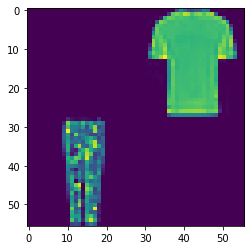

In [177]:
plt.imshow(expand_4times_rand(train_images,train_labels)[0][0])

### 4배 이미지 변환을 전체 train/test 데이터에 실행하여 train_multi_images, test_multi_images, train_multi_labels, train_multi_labels를 생성하세요.

In [189]:
train_multi_images, train_multi_labels = list(zip(*[expand_4times_rand(train_images,train_labels) for i in train_images]))

test_multi_images, test_multi_labels = list(zip(*[expand_4times_rand(test_images,test_labels) for i in test_images]))

In [190]:
len(train_multi_images[0])

1

In [192]:
train_multi_images = np.array(train_multi_images)

In [193]:
train_multi_images.shape

(60000, 1, 56, 56)

In [194]:
train_multi_images.shape

(60000, 1, 56, 56)

In [195]:
train_multi_images = np.array(train_multi_images[:,0,:,:].reshape(-1,56,56,1))
train_multi_labels = np.array(train_multi_labels)[:,0,:]


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [196]:
test_multi_images = np.array(test_multi_images[:,0,:,:].reshape(-1,56,56,1))
test_multi_labels = np.array(test_multi_labels)[:,0,:]
test_multi_images

TypeError: tuple indices must be integers or slices, not tuple

In [197]:
train_multi_images.shape, train_multi_labels.shape

AttributeError: 'tuple' object has no attribute 'shape'